# What soccer league scores most goals per match?

> Goals are the most important factors that define spectacularity of soccer matches. The more goals teams score, the more interesting to watch the game is. In this notebook i try to compare top european leagues in regard to mean goals scored per match attempting to determine what leagues worth watching and what not.  
  
> Source data for the analysis is match statistics for period since year 2000 up to 2017. Dataset credit goes to Kaggle user [sash](https://www.kaggle.com/sashchernuh/european-football).

## Preparations

As usual, first we import necessary libraries. We'll use sqlite3 driver to access our dataset. Also we import and initialize seaborn to improve graphics.

In [23]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
sns.set()

Futher we specify our interests in data columns (to reduce memory usage and increase speed) and leagues (to bound the analysis).

In [3]:
INTERESTING_COLUMNS = ['Country', 
                       'League',
                       'FTHG', # Full time home team goals
                       'FTAG', # Full time away team goals
                       'Date',
                       #'HomeTeam',
                       #'AwayTeam'
                      ]

In [4]:
INTERESTING_COUNTRIES = ['England'
                         , 'Germany'
                         , 'Spain'
                         , 'France'
                         , 'Italy']

In [5]:
INTERESTING_LEAGUES = ['Premier League'
                       , 'Bundesliga 1'
                       , 'La Liga Primera Division'
                       , 'Le Championnat'
                       , 'Serie A'
                      ]

Then, we read the data, check for NaNs (there are not), parse dates and combine league names with country names to get rid of ambigousness and make things clear.

In [6]:
with sqlite3.connect('database.sqlite') as con:
    results_df = pd.read_sql_query('select * from football_data', con)
    results_df = results_df[results_df['Country'].isin(INTERESTING_COUNTRIES)
                            & results_df['League'].isin(INTERESTING_LEAGUES)][INTERESTING_COLUMNS]

In [7]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31492 entries, 768 to 130430
Data columns (total 7 columns):
Country     31492 non-null object
League      31492 non-null object
FTHG        31492 non-null float64
FTAG        31492 non-null float64
Date        31492 non-null object
HomeTeam    31492 non-null object
AwayTeam    31492 non-null object
dtypes: float64(2), object(5)
memory usage: 1.9+ MB


In [9]:
results_df['Date'] = pd.to_datetime(results_df['Date'], infer_datetime_format=True)
results_df['Year'] = results_df['Date'].dt.year
results_df['CompetitionName'] = results_df['Country'] + ' - ' + results_df['League']

Finally, we construct our target variable as a mean of total goals scored for each match. We build a pivot table to structure the values versus years and leagues as these are two parameters of our analysis.

In [8]:
results_df['TotalGoals'] = results_df['FTHG'] + results_df['FTAG']

In [10]:
mean_scores = results_df.pivot_table(values='TotalGoals', index='Year', columns='CompetitionName', aggfunc='mean')

In [11]:
mean_scores

CompetitionName,England - Premier League,France - Le Championnat,Germany - Bundesliga 1,Italy - Serie A,Spain - La Liga Primera Division
Year,,,,,
2000,2.687805,2.375635,3.043210,2.657407,2.817610
2001,2.576408,2.489051,2.784314,2.741935,2.712500
2002,2.554987,2.309701,2.919192,2.632997,2.597143
2003,2.681356,2.144654,2.787611,2.600000,2.653367
2004,2.645533,2.172956,2.906977,2.631034,2.610951
2005,2.443769,2.097368,2.879085,2.655949,2.607973
2006,2.434010,2.306069,2.725490,2.580977,2.460705
2007,2.676550,2.176316,2.794118,2.559783,2.542199
2008,2.546174,2.314961,2.911765,2.505236,2.837838


So far so good, and now we're prepared for actual analysis.

## Visual analysis

Looking for the first insights, we'll first plot line graph of mean scores over years for each league. This will give us a general image of what's going on in our dta. 

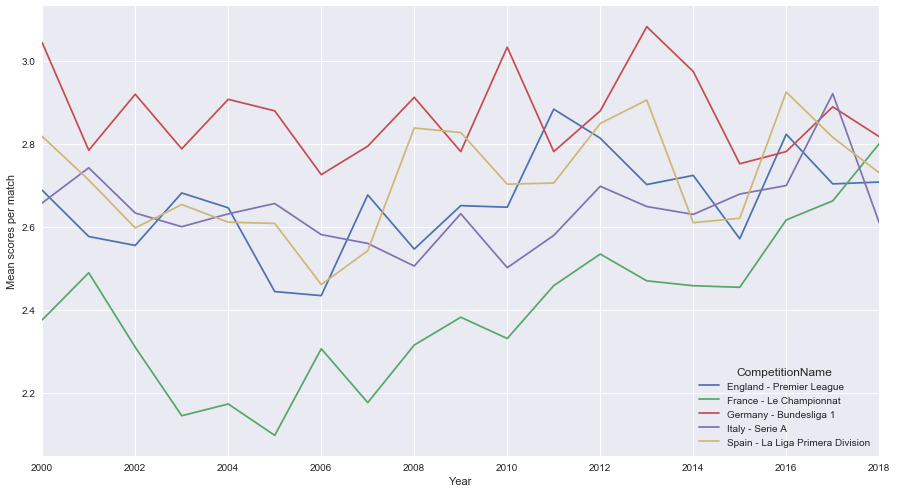

In [12]:
a4_dims = (15, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.ylabel('Mean scores per match')
mean_scores.plot(kind='line', ax=ax)

Well, over the last few years things tend to change, but if we look in general, we'll see that English, Spanish, German and Italian leagues are close enough, while French league is clearly different. We also can note that German and French leagues are the poles apart: German teams score significantly more than French.  
  
To make sure, let's take a closer look at their distributions and draw a box plot.

In [13]:
target_leagues = median_scores.reset_index()[['Year', 'Germany - Bundesliga 1', 'France - Le Championnat']]
# reset columns index's name to avoid confusion
target_leagues.columns.name = ''

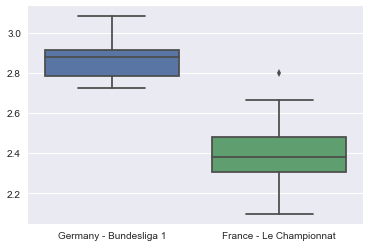

In [15]:
sns.boxplot(data=target_leagues[['Germany - Bundesliga 1', 'France - Le Championnat']])

As we see, the boxes indicate the same. Entire distribution for Bundesliga 1 does not intersect with that for Le Championnat.  
  
So, ghraphical analysis is confident saying that French league is signifacally different from German one in regard to mean goals scored per match. 
  
But to make absolutely sure, we must apply some formal method.

## Formal analysis

We'll use a standard Student's t-test for independent samples. But before it, we must make sure that our data is eligible for the test. This includes checking for distributions' normality and variances equality.  
  
For normality tests, we use scipiy's normaltest function that combines D'Agostino's and Pearson's tests into a single. Alpha is taken equal to a commonly used value of 0.05

In [16]:
def is_normal_distribution(sample):
    alpha = 0.05 # Typical confidence level
    statistic, pvalue = stats.normaltest(sample)
    return (pvalue > alpha)

In [17]:
bundesliga_is_norm_distr = is_normal_distribution(target_leagues['Germany - Bundesliga 1'])
championat_is_norm_distr = is_normal_distribution(target_leagues['France - Le Championnat'])
print('Normality test results:')
print(f'- Germany - Bundesliga 1: {bundesliga_is_norm_distr}')
print(f'- France - Le Championnat: {championat_is_norm_distr}')

Normality test results:
- Germany - Bundesliga 1: True
- France - Le Championnat: True


C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


For variances' equality test we'll use scipiy's implementation of Levene test.

In [18]:
def is_equal_variance(sample1, sample2):
    alpha = 0.05
    res = stats.levene(sample1, sample2)
    return (res.pvalue > alpha)

In [19]:
variance_equality = is_equal_variance(target_leagues['Germany - Bundesliga 1'], target_leagues['France - Le Championnat'])
print(f'Variance equality test result: {variance_equality}')

Variance equality test result: True


Good. All prerequisites are satisfied, and now we can run the test. Again, we employ scipy's implementation.

In [20]:
def are_samples_different(sample1, sample2):
    alpha = 0.05
    metric, pvalue = stats.ttest_ind(sample1, sample2)
    return (pvalue < alpha)

In [21]:
samples_differency = are_samples_different(target_leagues['Germany - Bundesliga 1'], target_leagues['France - Le Championnat'])
print(f'Do they actualy score differently? {samples_differency}')

Do they actualy score differently? True


And here is what we have been looking for. A formal mathematical evidence of the fact, that teams in La Championnate score less goals per match in average, compared to Bundesliga 1's teams. Formal method agrees with graphical one.

## Conclusion

For sure, soccer's beauty is not only about goals. And, for sure, you'll be pleased watching La Championnate matches as well as English Premier League, Italian Serie A or any other league's. This notebook studied only one aspect of the game, one of the easiest to quantify. But I hope you'll get an insight from it.  